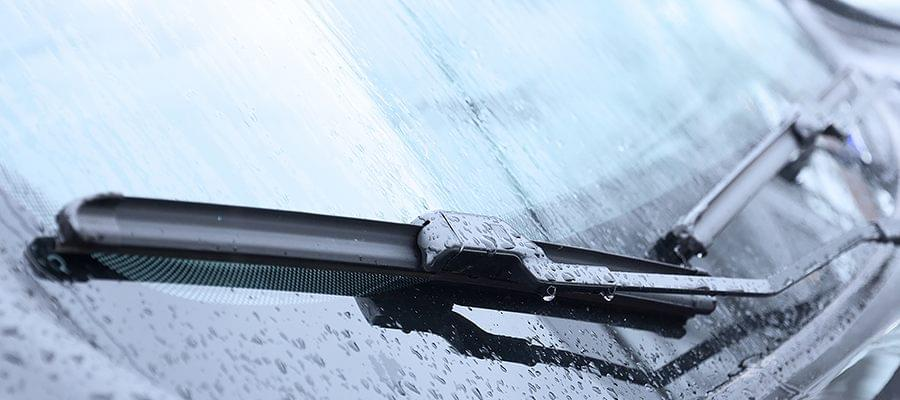

Hello Guys for this Kernel I will try to create my first analysis using Decision Tree and KNN. The dataset that we will be focusing is Glass Types, where we can find some patterns across the types of Glasses based on various characteristics.

PS: First Model created by my own! Still a lot of things to improve.

Any feedback would be great, I really appreciate it

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv('/kaggle/input/glass/glass.csv')

# Visualizing initial data in our dataset

In [ ]:
data.head()

In [ ]:
data.dtypes

In [ ]:
# checking the size of our dataset
data.shape

In [ ]:
# checking missing data. There's no missing values
data.isnull().sum().sum()

## Exploring our Dataset

In [ ]:
## Checking each column for outliers
fig = plt.figure(figsize = (12,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)

# Boxplot for RI
ax1.boxplot(data['RI'])
ax1.set_title('Distribution of RI')

# Boxplot for Na
ax2.boxplot(data['Na'])
ax2.set_title('Distribution of Na')

# Boxplot for Mg
ax3.boxplot(data['Mg'])
ax3.set_title('Distribution of Mg')


# Boxplot for AL
ax4.boxplot(data['Al'])
ax4.set_title('Distribution of Al')



# Boxplot for Si
ax5.boxplot(data['Si'])
ax5.set_title('Distribution of Si')


# Boxplot for K
ax6.boxplot(data['K'])
ax6.set_title('Distribution of K')

# Boxplot for Ca
ax7.boxplot(data['Ca'])
ax7.set_title('Distribution of Ca')


# Boxplot for Ba
ax8.boxplot(data['Ba'])
ax8.set_title('Distribution of Ba')


# Boxplot for Fe
ax9.boxplot(data['Fe'])
ax9.set_title('Distribution of Fe');


Visualizing the frequency from the each type

In [ ]:
sns.distplot(data['Type'], kde = False)

## Dividing into X e y 

In [ ]:
X = data.iloc[:,:-1]
X

In [ ]:
y = data['Type']
y

## Splitting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 50)

## Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
classifier_tree = tree.DecisionTreeClassifier()

In [ ]:
classifier_tree.fit(X_train, y_train)

Visualizing our Tree

In [ ]:
plt.figure(figsize = (20,10))
tree.plot_tree(classifier_tree);

Not the best visualization for this, but is the one i found it.. If anyone have other suggestion would be great!

## Predictions with our Decision Tree

In [ ]:
predict_type = classifier_tree.predict(X_test)

In [ ]:
predict_type

In [ ]:
## Let's plot to see how it's performance
sns.distplot(y_test, kde = False)
sns.distplot(predict_type, kde = False)

Not exactly what we expected, but for the first try, it is a good result. For me! xD

Accuracy of the Tree

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,predict_type)

## Testing with K Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier_n = KNeighborsClassifier()

In [ ]:
# important to mention that n_neighbors = 5, is not a multiple value of our quantity of features
classifier_n.fit(X_train,y_train)

## Making Predictions with our KNN

In [ ]:
predict_type_n = classifier_n.predict(X_test)

In [ ]:
## Let's plot to see how it's performance
sns.distplot(y_test, kde = False)
sns.distplot(predict_type_n, kde = False)

Is this data we can see that probably the decision tree has a higher accuracy, but we better check with accuracy_score

In [ ]:
accuracy_score(y_test,predict_type_n)

## Conclusion:

For this dataset the decision tree did a higher job predicting each type of glass would be based on theses features.
Isn't the best result on the various kernels around there, but for me as a rookie and apprentice i found it very interesting and pride for the results!

Thanks!
